In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install tensorflow

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow

In [13]:
import os
# Define the base path correctly
base_path = r"E:\Techathon_672\images"

# Update paths for train, validation, and test sets
train_path = os.path.join(base_path, "TRAIN")
valid_path = os.path.join(base_path, "TEST")
test_path = os.path.join(base_path, "TEST_SIMPLE")

# Print paths to verify
print("Train Path:", train_path)
print("Validation Path:", valid_path)
print("Test Path:", test_path)

Train Path: E:\Techathon_672\images\TRAIN
Validation Path: E:\Techathon_672\images\TEST
Test Path: E:\Techathon_672\images\TEST_SIMPLE


In [37]:
# function is used to create an image dataset from a directory structure where images are organized into subdirectories representing class labels
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,=
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 9957 files belonging to 4 classes.


In [38]:
# Get the class labels
labels = training_set.class_names
print(labels)


['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


In [39]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 2487 files belonging to 4 classes.


In [40]:
import tensorflow as tf

cnn = tf.keras.models.Sequential()

# Block 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 2
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 3 (Removed Redundant Input Shape)
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 5
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Dropout for Regularization
cnn.add(tf.keras.layers.Dropout(0.4))

# Flattening & Fully Connected Layers
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1024, activation='relu'))  # Reduced from 1500
cnn.add(tf.keras.layers.Dropout(0.5))

# Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))  # Ensure categorical_crossentropy loss



In [41]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])



In [42]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_51 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 batch_normalization_25 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_53 (Conv2D)          (None, 61, 61, 64)       

In [45]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
312/312 [==============================] - 42s 134ms/step - loss: 1.3044 - accuracy: 0.5283 - val_loss: 4.5495 - val_accuracy: 0.3965
Epoch 2/50
312/312 [==============================] - 29s 92ms/step - loss: 0.5172 - accuracy: 0.7845 - val_loss: 4.2998 - val_accuracy: 0.3735
Epoch 3/50
312/312 [==============================] - 29s 94ms/step - loss: 0.3002 - accuracy: 0.8828 - val_loss: 0.8279 - val_accuracy: 0.7776
Epoch 4/50
312/312 [==============================] - 29s 94ms/step - loss: 0.1794 - accuracy: 0.9293 - val_loss: 1.4805 - val_accuracy: 0.6940
Epoch 5/50
312/312 [==============================] - 29s 94ms/step - loss: 0.1483 - accuracy: 0.9434 - val_loss: 2.4291 - val_accuracy: 0.5987
Epoch 6/50
312/312 [==============================] - 29s 93ms/step - loss: 0.0996 - accuracy: 0.9612 - val_loss: 1.5835 - val_accuracy: 0.7093
Epoch 7/50
312/312 [==============================] - 29s 94ms/step - loss: 0.0639 - accuracy: 0.9781 - val_loss: 4.1754 - val_accuracy

In [46]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


312/312 [==============================] - 8s 26ms/step - loss: 0.0037 - accuracy: 0.9988
Training accuracy: 0.9987947940826416


In [47]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

78/78 [==============================] - 2s 28ms/step - loss: 1.8244 - accuracy: 0.8118
Validation accuracy: 0.811821460723877


In [48]:
cnn.save(r"E:\Techathon_672\trained_cancer_model.h5")

In [49]:
training_history.history

{'loss': [1.3044147491455078,
  0.5171796679496765,
  0.3001507520675659,
  0.17941035330295563,
  0.14833304286003113,
  0.09963464736938477,
  0.06386815011501312,
  0.0619649738073349,
  0.06663168221712112,
  0.039277583360672,
  0.08084946125745773,
  0.051781658083200455,
  0.02910303696990013,
  0.026092562824487686,
  0.03329436853528023,
  0.056494686752557755,
  0.06653446704149246,
  0.02060076966881752,
  0.05122119560837746,
  0.05020273104310036,
  0.012483139522373676,
  0.02732721157371998,
  0.017858976498246193,
  0.062296219170093536,
  0.05865916982293129,
  0.010997287929058075,
  0.009781734086573124,
  0.03260602802038193,
  0.04789341986179352,
  0.020946942269802094,
  0.010786137543618679,
  0.04234657436609268,
  0.03000756911933422,
  0.007523796521127224,
  0.020647235214710236,
  0.024635642766952515,
  0.016152573749423027,
  0.009399454109370708,
  0.018389930948615074,
  0.040579091757535934,
  0.007979325950145721,
  0.0015670752618461847,
  0.01476760

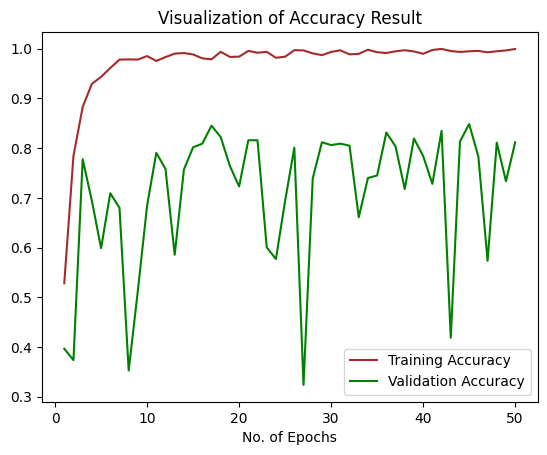

In [51]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()